In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler


In [ ]:
from sklearn.cluster import KMeans
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc

In [ ]:
ds = pd.read_csv('/content/sample_data/Telco_Customer_Churn_Dataset  (3).csv')
ds


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


In [ ]:
ds.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
ds.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,No,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,Yes,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes
7042,3186-AJIEK,Male,0,No,No,66,Yes,No,Fiber optic,Yes,No,Yes,Yes,Yes,Yes,Two year,Yes,Bank transfer (automatic),105.65,6844.5,No


<ipython-input-35-cd91ded16410>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=ds, palette='coolwarm')


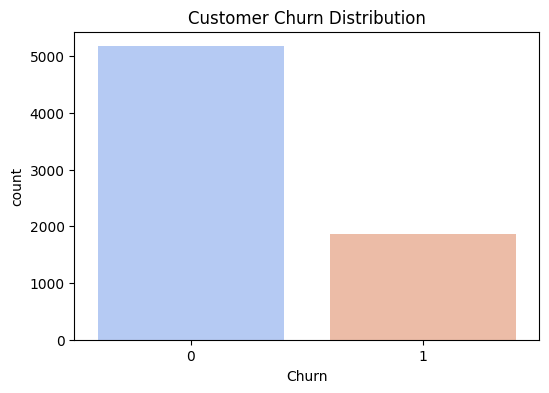

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=ds, palette='coolwarm')
plt.title('Customer Churn Distribution')
plt.show()


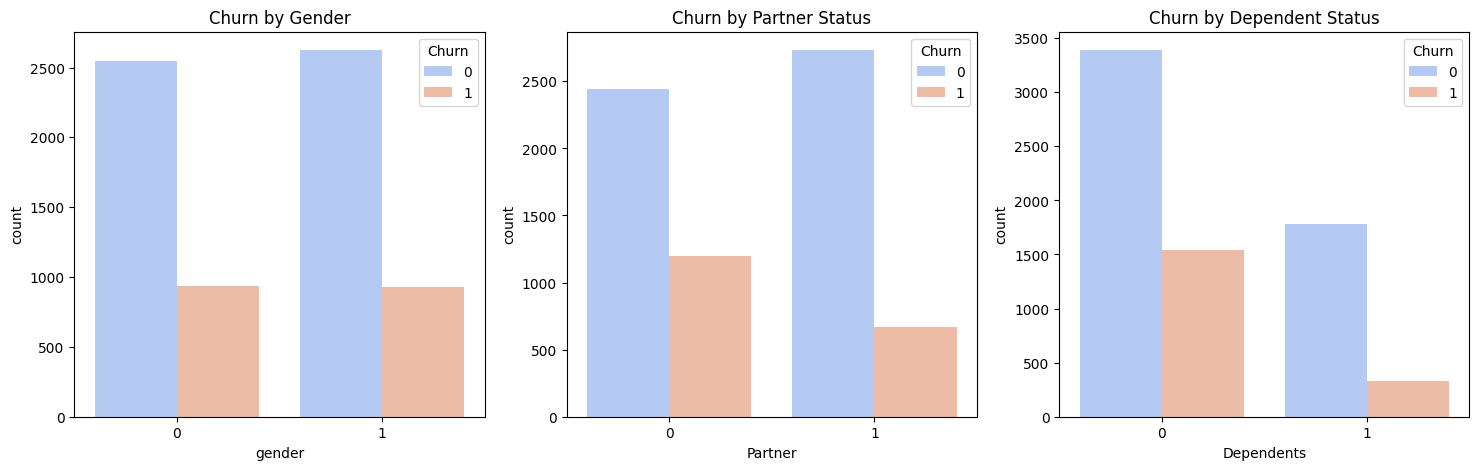

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='gender', hue='Churn', data=ds, ax=axes[0], palette='coolwarm')
axes[0].set_title('Churn by Gender')
sns.countplot(x='Partner', hue='Churn', data=ds, ax=axes[1], palette='coolwarm')
axes[1].set_title('Churn by Partner Status')
sns.countplot(x='Dependents', hue='Churn', data=ds, ax=axes[2], palette='coolwarm')
axes[2].set_title('Churn by Dependent Status')
plt.show()

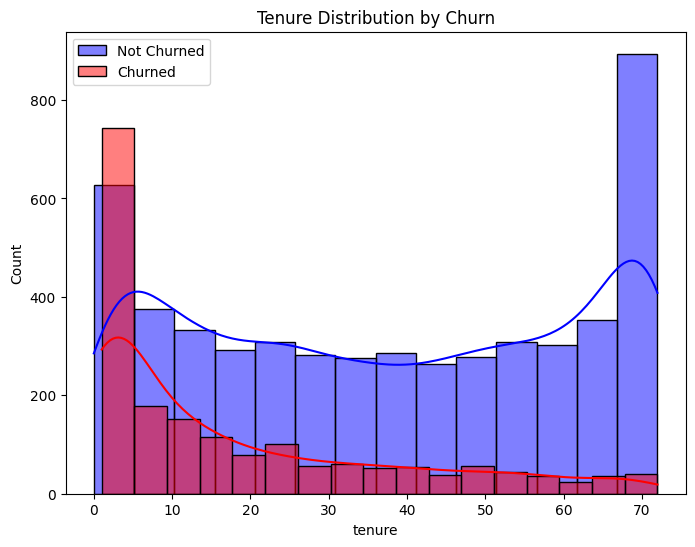

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(ds[ds['Churn'] == 0]['tenure'], kde=True, color='blue', label='Not Churned')
sns.histplot(ds[ds['Churn'] == 1]['tenure'], kde=True, color='red', label='Churned')
plt.legend()
plt.title('Tenure Distribution by Churn')
plt.show()

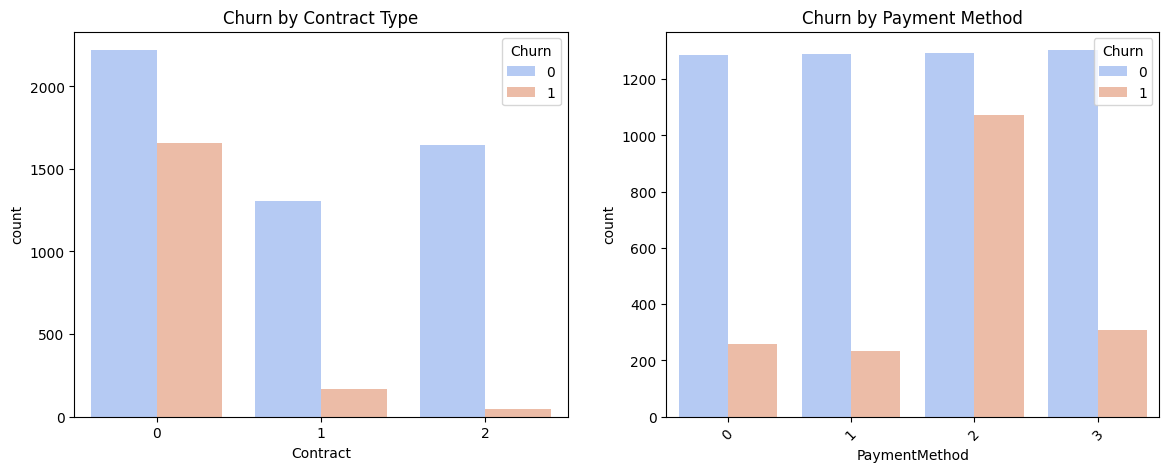

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(14, 5))
sns.countplot(x='Contract', hue='Churn', data=ds, ax=axes[0], palette='coolwarm')
axes[0].set_title('Churn by Contract Type')
sns.countplot(x='PaymentMethod', hue='Churn', data=ds, ax=axes[1], palette='coolwarm')
axes[1].set_title('Churn by Payment Method')
plt.xticks(rotation=45)
plt.show()

In [ ]:
ds.isnull().sum()


,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [ ]:
for columns in  ds.columns:
  if ds[columns].isnull().sum()> 0:
    if ds[columns].dtype=='object':
      ds[columns].fillna(ds[columns].mode()[0],inplace=True)
    else:
      ds[columns].fillna(ds[columns].mean(),inplace=True)


In [ ]:
label_encoders = {}
for column in ds.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    ds[column] = le.fit_transform(ds[column])
    label_encoders[column] = le

In [ ]:
X = ds.drop(columns=['Churn'])
y = ds['Churn']

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

In [ ]:
# Normalize numerical features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


<ipython-input-45-cd91ded16410>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Churn', data=ds, palette='coolwarm')


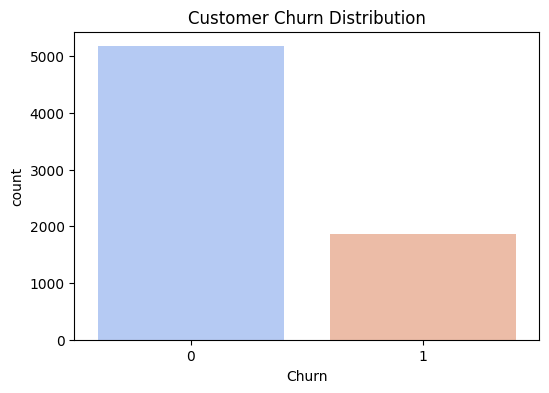

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Churn', data=ds, palette='coolwarm')
plt.title('Customer Churn Distribution')
plt.show()

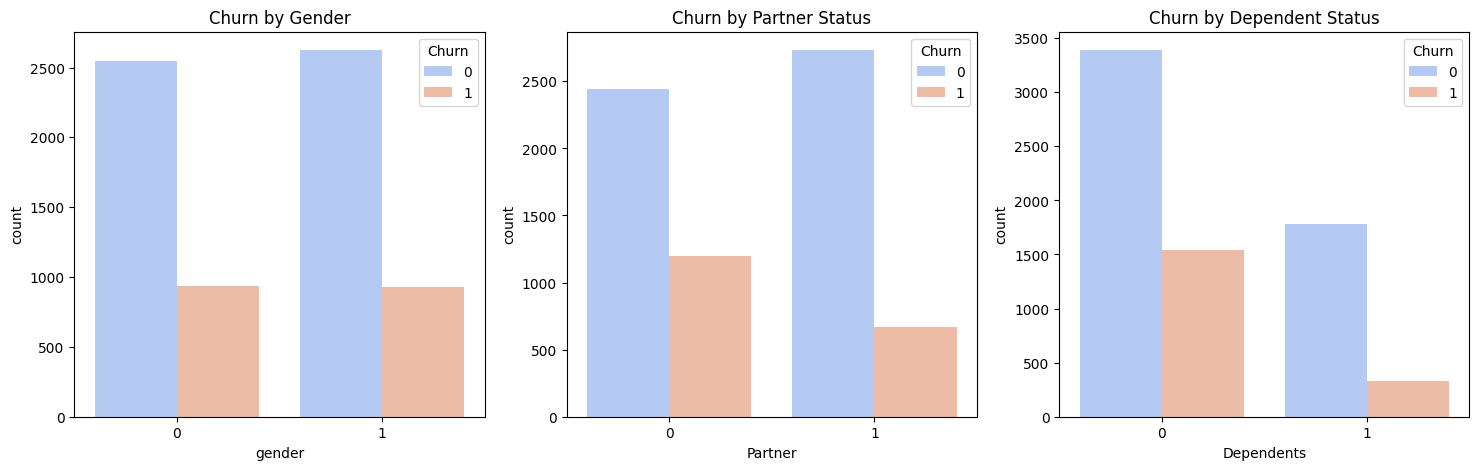

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(18, 5))
sns.countplot(x='gender', hue='Churn', data=ds, ax=axes[0], palette='coolwarm')
axes[0].set_title('Churn by Gender')
sns.countplot(x='Partner', hue='Churn', data=ds, ax=axes[1], palette='coolwarm')
axes[1].set_title('Churn by Partner Status')
sns.countplot(x='Dependents', hue='Churn', data=ds, ax=axes[2], palette='coolwarm')
axes[2].set_title('Churn by Dependent Status')
plt.show()

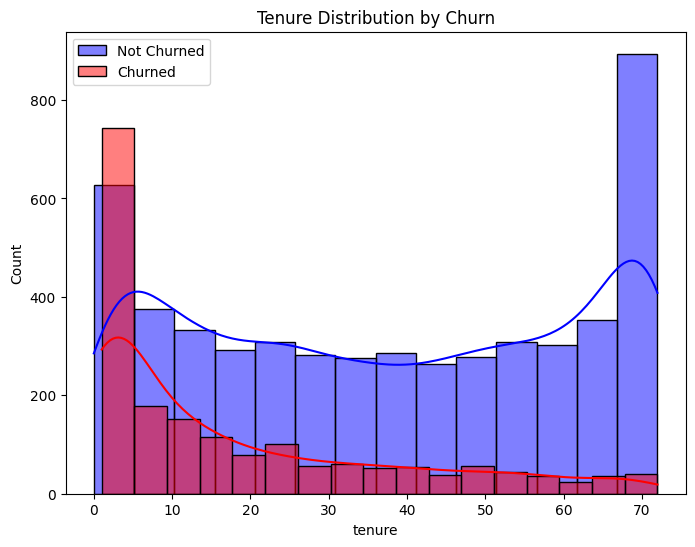

In [ ]:
plt.figure(figsize=(8,6))
sns.histplot(ds[ds['Churn'] == 0]['tenure'], kde=True, color='blue', label='Not Churned')
sns.histplot(ds[ds['Churn'] == 1]['tenure'], kde=True, color='red', label='Churned')
plt.legend()
plt.title('Tenure Distribution by Churn')
plt.show()

In [ ]:
# Customer Segmentation
segmentation_features = ds[['tenure', 'MonthlyCharges', 'Contract']]
kmeans = KMeans(n_clusters=3, random_state=42)
ds['Segment'] = kmeans.fit_predict(segmentation_features)

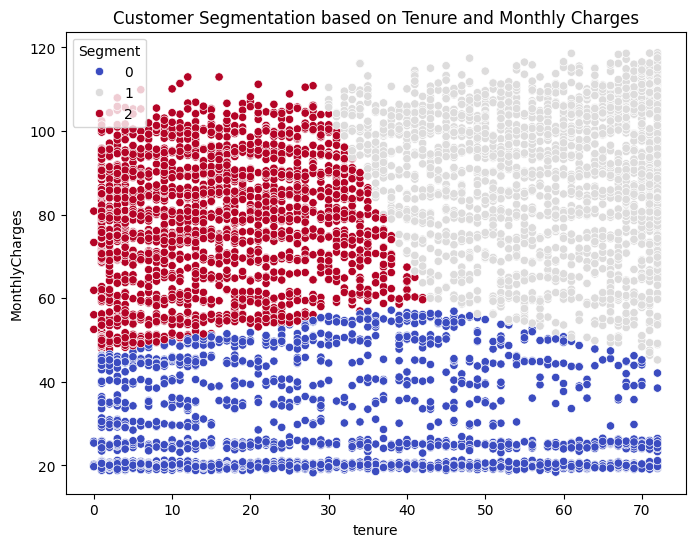

In [ ]:
plt.figure(figsize=(8,6))
sns.scatterplot(x=ds['tenure'], y=ds['MonthlyCharges'], hue=ds['Segment'], palette='coolwarm')
plt.title('Customer Segmentation based on Tenure and Monthly Charges')
plt.show()

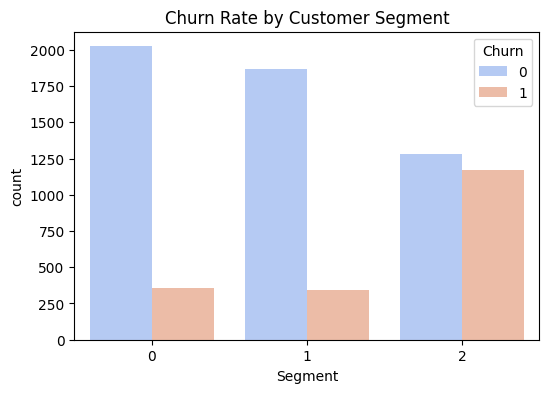

In [ ]:
plt.figure(figsize=(6,4))
sns.countplot(x='Segment', hue='Churn', data=ds, palette='coolwarm')
plt.title('Churn Rate by Customer Segment')
plt.show()

In [ ]:
models = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree': DecisionTreeClassifier(),
    'Random Forest': RandomForestClassifier()
}

In [ ]:
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    print(f"{name} Performance:")
    print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
    print(f"Precision: {precision_score(y_test, y_pred):.4f}")
    print(f"Recall: {recall_score(y_test, y_pred):.4f}")
    print(f"F1-Score: {f1_score(y_test, y_pred):.4f}\n")

Logistic Regression Performance:
Accuracy: 0.7913
Precision: 0.6307
Recall: 0.5160
F1-Score: 0.5676

Decision Tree Performance:
Accuracy: 0.7133
Precision: 0.4621
Recall: 0.4893
F1-Score: 0.4753

Random Forest Performance:
Accuracy: 0.7913
Precision: 0.6389
Recall: 0.4920
F1-Score: 0.5559



In [ ]:
# Model Evaluation and Interpretation
best_model = RandomForestClassifier()
best_model.fit(X_train, y_train)
y_pred_proba = best_model.predict_proba(X_test)[:, 1]


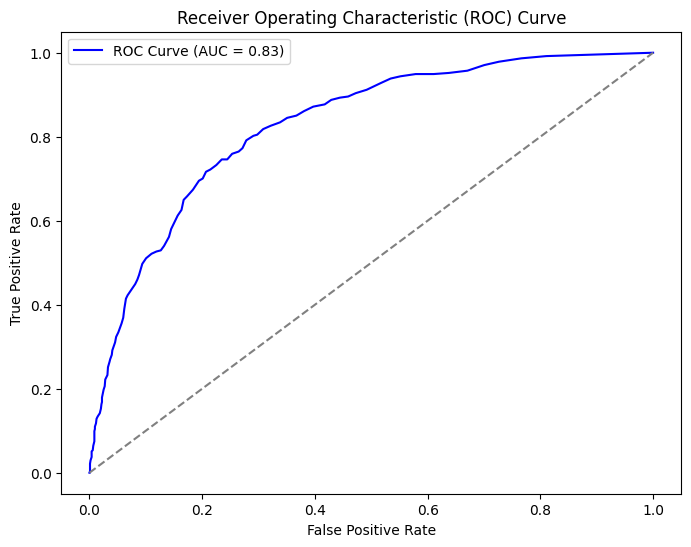

In [ ]:
# ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
plt.figure(figsize=(8,6))
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()


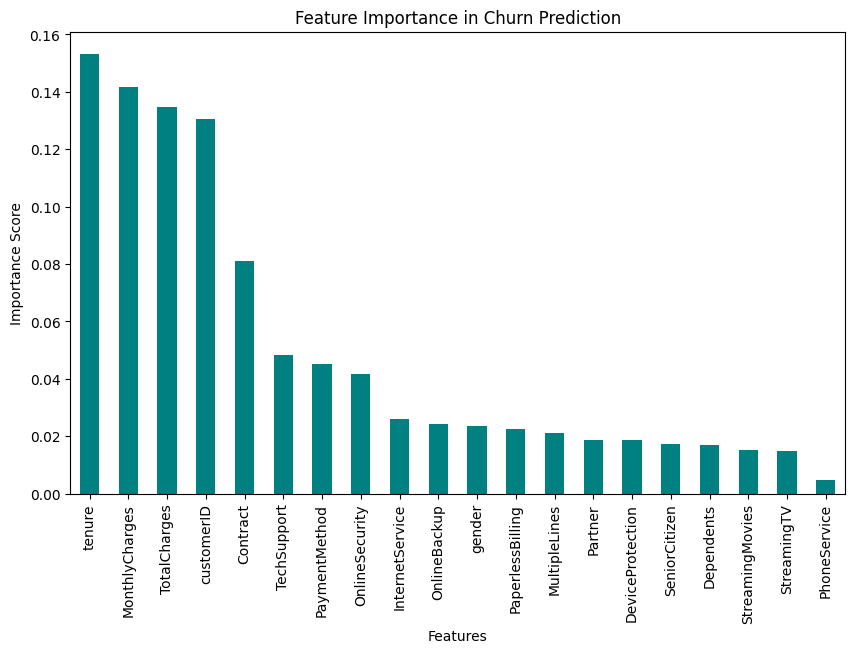

In [ ]:
# Feature Importance
feature_importances = pd.Series(best_model.feature_importances_, index=X.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar', figsize=(10,6), color='teal')
plt.title('Feature Importance in Churn Prediction')
plt.xlabel('Features')
plt.ylabel('Importance Score')
plt.show()


In [ ]:
import joblib

joblib.dump(model, "customer-churn-prediction.pkl")

['customer-churn-prediction.pkl']

In [ ]:
!pip install huggingface_hub


In [ ]:
from huggingface_hub import notebook_login
notebook_login()


In [ ]:
from huggingface_hub import HfApi

repo_name = "customer-churn-prediction"
model_file_name = "customer-churn-prediction.pkl"

api = HfApi()
api.upload_file(
    path_or_fileobj=model_file_name,
    path_in_repo=model_file_name,
    repo_id=f"AIExplorer1234/{repo_name}",
    commit_message="Re-upload model file",
    commit_description="Forcing update of model file",
     # This will force the upload
)



No files have been modified since last commit. Skipping to prevent empty commit.


CommitInfo(commit_url='https://huggingface.co/AIExplorer1234/customer-churn-prediction/commit/c7ee169fd16b6d992c6e1de75d8aa58d46fffde8', commit_message='Re-upload model file', commit_description='Forcing update of model file', oid='c7ee169fd16b6d992c6e1de75d8aa58d46fffde8', pr_url=None, repo_url=RepoUrl('https://huggingface.co/AIExplorer1234/customer-churn-prediction', endpoint='https://huggingface.co', repo_type='model', repo_id='AIExplorer1234/customer-churn-prediction'), pr_revision=None, pr_num=None)